In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [15]:
whole_data = pd.read_csv(r'C:\Users\JuJu\Desktop\DI-Bootcamp\Deltika\performances_data.csv')
meta_data = pd.read_csv(r'C:\Users\JuJu\Desktop\DI-Bootcamp\Deltika\meta_data.csv')

In [16]:
whole_data.head()

,id,year,month,income
0,31415,2021,6,178.498924
1,31415,2021,5,180.846730
2,31415,2021,4,175.405917
3,31415,2021,3,154.506319
4,31415,2021,2,140.830969


In [17]:
whole_data.count()

id        1440
year      1440
month     1440
income    1440
dtype: int64

In [18]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1440 non-null   int64  
 1   year    1440 non-null   int64  
 2   month   1440 non-null   int64  
 3   income  1440 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 45.1 KB


In [19]:
# after cheking that the year and month column is int and would be calculate as number in the next tasks, 
# I decided to change it for str

In [20]:
whole_data = whole_data.astype({"year": str, 'month':str})
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1440 non-null   int64  
 1   year    1440 non-null   object 
 2   month   1440 non-null   object 
 3   income  1440 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 45.1+ KB


In [21]:
whole_data.describe()

,id,income
count,1.440000e+03,1440.000000
mean,1.224781e+07,195.131023
std,1.337185e+07,34.594137
min,0.000000e+00,117.134174
25%,2.406575e+04,169.807996
50%,8.616984e+06,192.746357
75%,2.132692e+07,217.208782
max,6.626070e+07,300.111043


# Datasets: 

# mean df

In [31]:
ids = whole_data['id'].values
unique_ids = list(dict.fromkeys(ids))

print(unique_ids)


[31415, 628318, 27182818, 5772156, 16180339, 14142135, 17320508, 22360679, 26457513, 33166247, 1729, 8121980, 17121903, 1011879, 1492, 0, 711, 7031876, 1928, 21071969, 28091895, 9111989, 7111867, 3121994, 1011983, 10000300, 23091846, 66260701, 25121642, 15021564, 5091946, 1978, 1979, 1998, 2018, 23061912, 1859, 22091791, 20071822, 14031879]


In [35]:
def get_mean(column_name):
    means_list = []
    for i in unique_ids:
        m = whole_data.loc[whole_data['id'] == i, column_name].mean()
        means_list.append(m)
    return means_list
    
means_list = get_mean('income')

In [36]:
d = {"id":unique_ids, 'mean': means_list}
mean_data = pd.DataFrame(d)
mean_data.head()

,id,mean
0,31415,160.366902
1,628318,160.420345
2,27182818,160.355370
3,5772156,160.450668
4,16180339,159.905640


# STD df

In [40]:
def get_std(column_name):
    std_list = []
    for i in unique_ids:
        s = whole_data.loc[whole_data['id'] == i, column_name].std()
        std_list.append(s)
    return std_list
    
std_list = get_std('income')

In [41]:
d2 = {"id":unique_ids, 'std': std_list}
std_data = pd.DataFrame(d2)
std_data.head()

,id,std
0,31415,18.886426
1,628318,19.361674
2,27182818,18.940191
3,5772156,19.478422
4,16180339,19.304302


# Mean and STD df 

In [42]:
d3 = {"id":unique_ids, 'mean': means_list, 'std': std_list}
mean_std = pd.DataFrame(d3)
mean_std.head()

,id,mean,std
0,31415,160.366902,18.886426
1,628318,160.420345,19.361674
2,27182818,160.355370,18.940191
3,5772156,160.450668,19.478422
4,16180339,159.905640,19.304302


In [44]:
mean_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      40 non-null     int64  
 1   mean    40 non-null     float64
 2   std     40 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB


# Task A) and B): plot the data and inspect the graphs

# 1 and 4: whole_data and mean_std

In [61]:
years = whole_data['year']
months = whole_data['month']
income = whole_data['income']


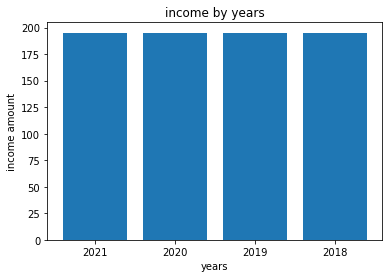

In [62]:
x = years
y = income
plt.bar(x, y)
plt.xlabel('years')
plt.ylabel('income amount')
plt.title('income by years')
plt.show()

In [48]:
# income by years: # we can see that 2021`s incomes 
# potencially will be more than 2020`s incomes because these data is just for the first six months of 2021

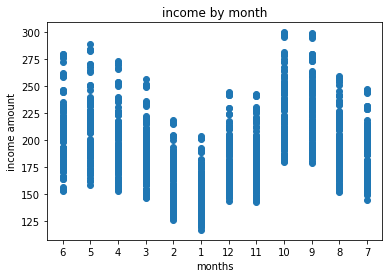

In [49]:
plt.scatter(months, income)
plt.xlabel('months')
plt.ylabel('income amount')
plt.title('income by month')
plt.show()

In [50]:
# income by month: 
# we can see clearly what are the months that the income amount is better: September and October.

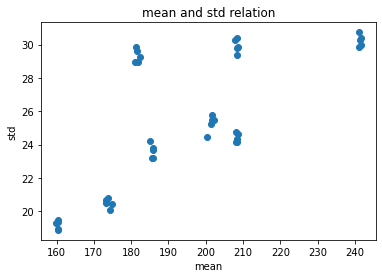

In [422]:
v_mean = mean_std['mean']
v_std = mean_std['std']
plt.scatter(v_mean, v_std)
plt.xlabel('mean')
plt.ylabel('std')
plt.title('mean and std relation')
plt.show()

In [51]:
# mean and std relation:
# we can see ~7 groups of relational mean and std

# 2 and 3: Ploting mean_data and std_data

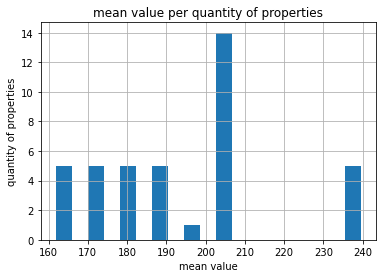

In [52]:
mean_data.hist(column = 'mean', rwidth= 0.5)
plt.title('mean value per quantity of properties')
plt.xlabel('mean value')
plt.ylabel('quantity of properties')
plt.show()




In [425]:
# quantity of properties
# we can see that there are 4 groups of mean: 
# A) mean between ~160 and ~192
# B) mean between ~192 and ~200
# C) mean between ~200 and ~209 
# D) mean between ~233 and ~241

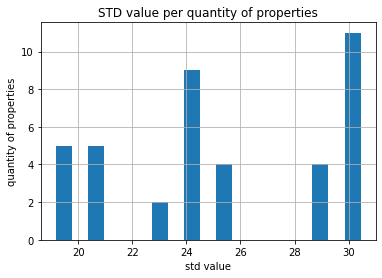

In [53]:
std_data.hist(column = 'std', rwidth= 0.5)
plt.title('STD value per quantity of properties')
plt.xlabel('std value')
plt.ylabel('quantity of properties')
plt.show()

In [54]:
# STD value per quantity of properties:
# we can see that there are 3 groups of std:
# A) std between ~19.5 and ~21.5
# B) std between ~22.5 and ~26
# C) std between ~28.5 and ~31 

# Task C) K-means and elbow method

In [55]:
from sklearn.cluster import KMeans

C:\Users\JuJu\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


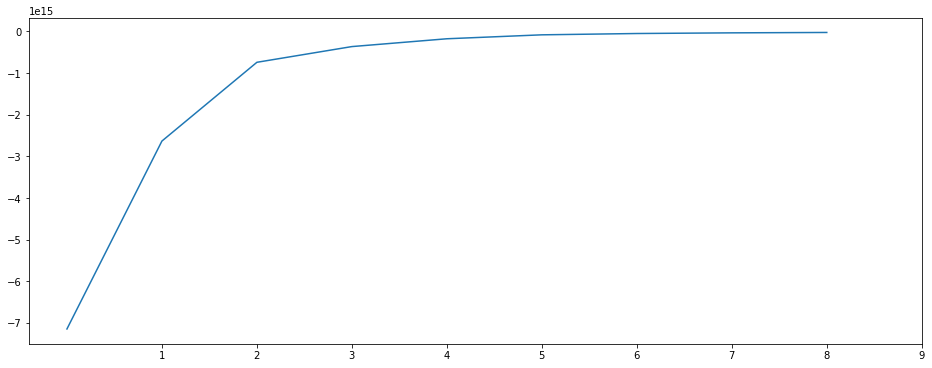

In [429]:
n_cluster = range(1,10)

kmeans = [KMeans(n_clusters=i).fit(mean_std) for i in n_cluster]

scores = [kmeans[i].score(mean_std) for i in range(len(kmeans))]
    
f = plt.figure(1, figsize=(16,6))
plt.plot(scores)
_=plt.xticks(n_cluster)

In [430]:
scores = np.array(scores)
dif_scores = scores / scores[0]
dif_scores = np.diff(dif_scores)
n_clusters = np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
print(n_clusters)

6


# optimal number of clusters = 6

# Task D) Verify the results

In [431]:
# a)Merge the neighborhood and number of rooms data into the performances data.

In [56]:
meta_data.head()

,id,name,neighborhood,rooms
0,31415,Pi rd.,Chelsea,1
1,628318,Tau st.,Chelsea,1
2,27182818,Euler place,Chelsea,1
3,5772156,Euler–Mascheroni place,Chelsea,1
4,16180339,Golden cirlce,Chelsea,1


In [57]:
all_data = pd.merge(whole_data, meta_data, on='id')
all_data.head()

,id,year,month,income,name,neighborhood,rooms
0,31415,2021,6,178.498924,Pi rd.,Chelsea,1
1,31415,2021,5,180.846730,Pi rd.,Chelsea,1
2,31415,2021,4,175.405917,Pi rd.,Chelsea,1
3,31415,2021,3,154.506319,Pi rd.,Chelsea,1
4,31415,2021,2,140.830969,Pi rd.,Chelsea,1


In [58]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1440 non-null   int64  
 1   year          1440 non-null   object 
 2   month         1440 non-null   object 
 3   income        1440 non-null   float64
 4   name          1440 non-null   object 
 5   neighborhood  1440 non-null   object 
 6   rooms         1440 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 90.0+ KB


In [435]:
# b) Plot the data with a unique color for each combination of unique neighborhood and number of rooms

In [436]:
def get_uniques(column_name):
    uniques = []
    for i in all_data[column_name]:
        if i not in uniques:
            uniques.append(i)
    return uniques

In [437]:
neighborhood_list = get_uniques('neighborhood')
print(neighborhood_list)

['Chelsea', 'Fulham', 'Soho', 'North Greenwich']


In [438]:
rooms_list = get_uniques('rooms')
print(rooms_list)

[1, 2]


In [439]:
all_data['neighborhood-rooms'] = all_data['neighborhood'] +"-"+ all_data["rooms"].astype(str)
neigh_rooms = all_data.drop(columns = ['neighborhood', 'rooms'])

In [440]:
neigh_rooms.head()

,id,year,month,income,name,neighborhood-rooms
0,31415,2021,6,178.498924,Pi rd.,Chelsea-1
1,31415,2021,5,180.846730,Pi rd.,Chelsea-1
2,31415,2021,4,175.405917,Pi rd.,Chelsea-1
3,31415,2021,3,154.506319,Pi rd.,Chelsea-1
4,31415,2021,2,140.830969,Pi rd.,Chelsea-1


In [441]:
just_neigh_rooms = neigh_rooms.loc[:, ['id', 'neighborhood-rooms']]
just_neigh_rooms = just_neigh_rooms.drop_duplicates(keep= 'first')

In [442]:
just_neigh_rooms = pd.merge(just_neigh_rooms, mean_std)
just_neigh_rooms.head()

,id,neighborhood-rooms,mean,std
0,31415,Chelsea-1,160.366902,18.886426
1,628318,Chelsea-1,160.420345,19.361674
2,27182818,Chelsea-1,160.355370,18.940191
3,5772156,Chelsea-1,160.450668,19.478422
4,16180339,Chelsea-1,159.905640,19.304302


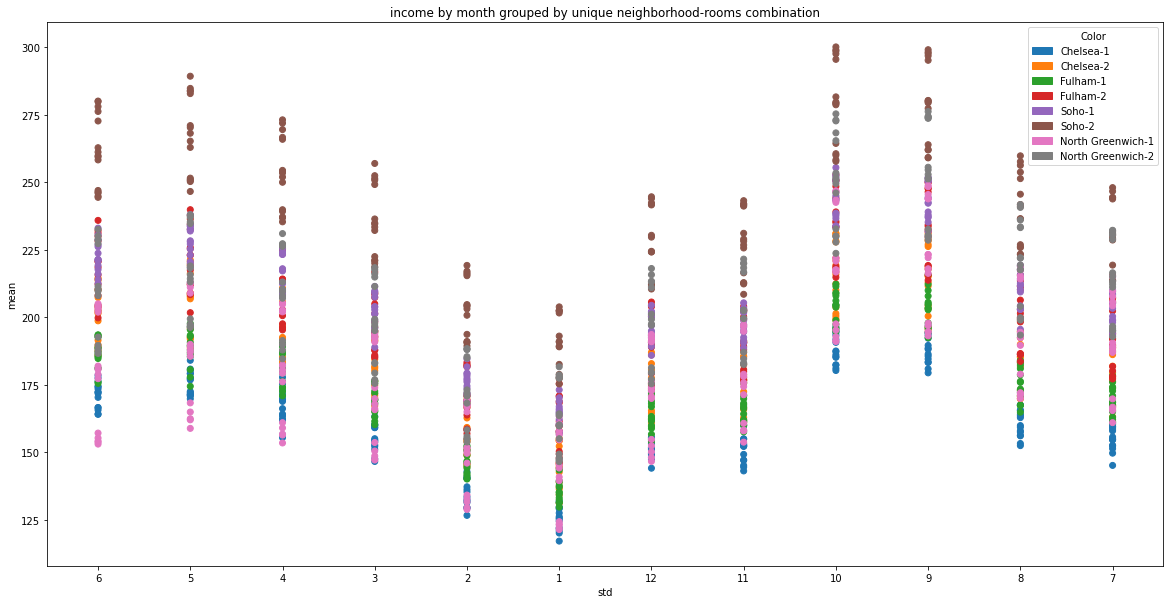

In [450]:
import matplotlib.patches

levels, categories = pd.factorize(neigh_rooms['neighborhood-rooms'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

plt.figure(figsize=(20, 10))
plt.scatter(neigh_rooms['month'], neigh_rooms['income'], c=colors,)
plt.gca().set(xlabel='months', ylabel='mean', title='income by month grouped by unique neighborhood-rooms combination')
plt.legend(handles=handles,  title='Color')

In [444]:
# c)Does the groups found in (b), (c) match the partition made by different neighborhoods and number of rooms?
# the partition is of 8 groups. It doesn`t match with the groups found in (B) and (C) but it is very approximated with the groups found in (B) 
# on the plot "mean and std relation" and it is exactly the number showed as the last point of the graphic made in the first part of (C)